In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Nishita\Desktop\customer\Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
df.shape

(200, 5)

In [6]:
print("Number of Rows",df.shape[0])
print("Number of Columns",df.shape[1])

Number of Rows 200
Number of Columns 5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


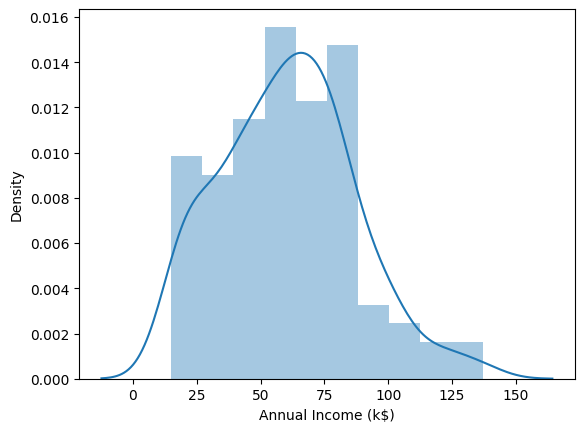

In [10]:
sns.distplot(df['Annual Income (k$)']);

In [11]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

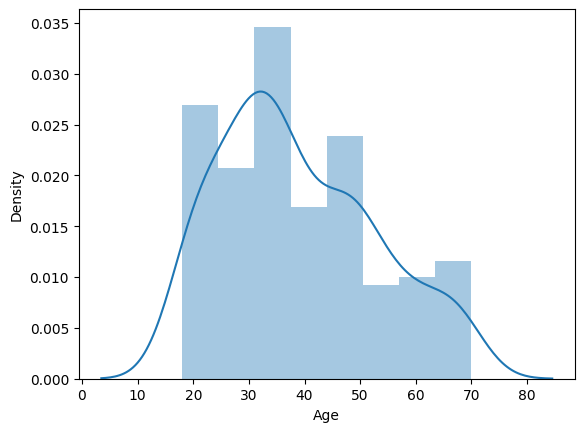

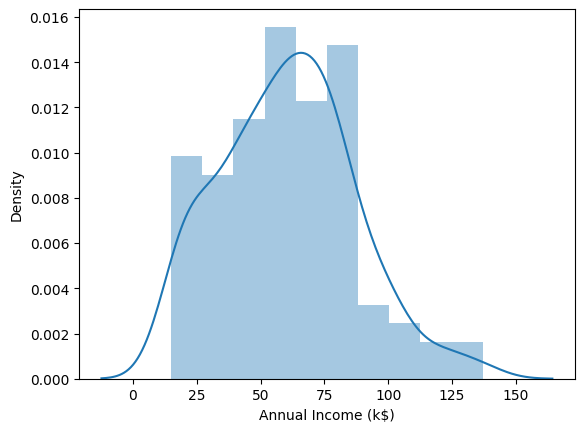

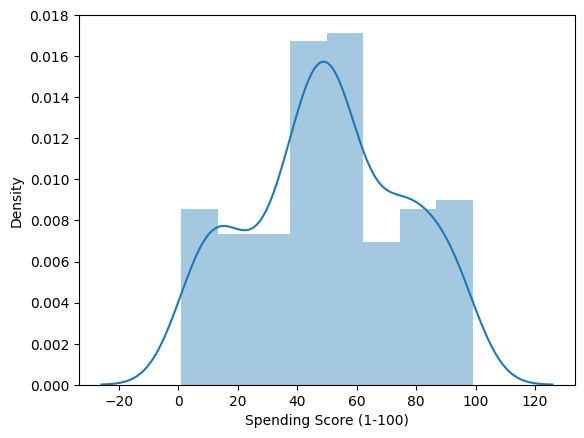

In [12]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

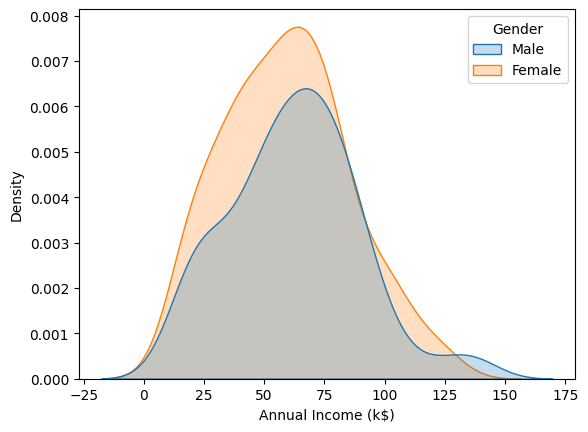

In [13]:
sns.kdeplot(data=df, x='Annual Income (k$)', shade=True, hue='Gender')

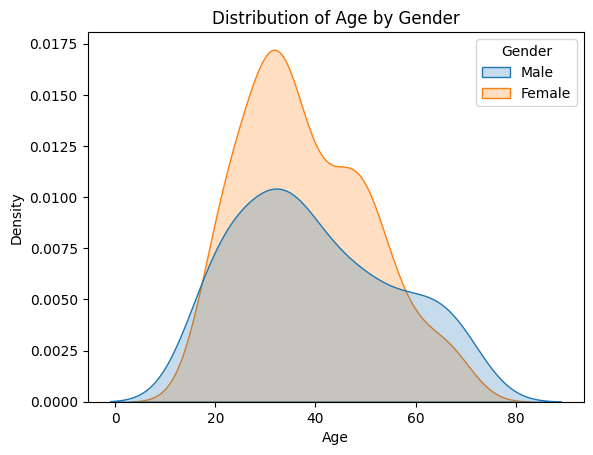

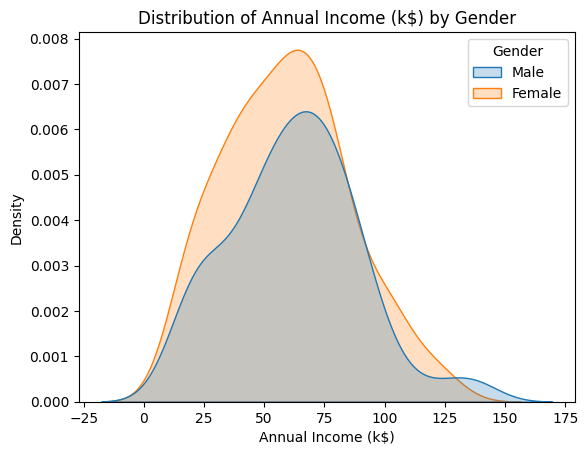

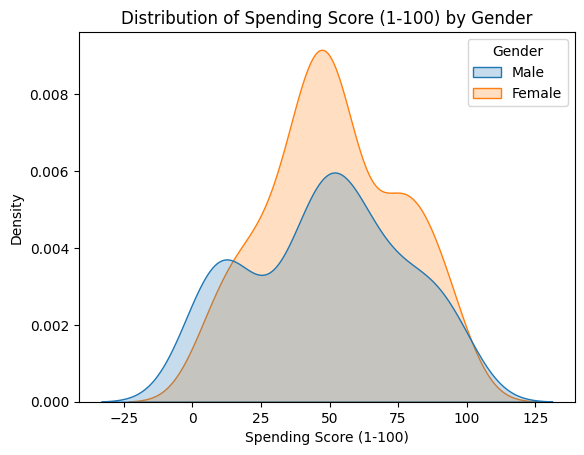

In [14]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for col in columns:
    plt.figure()
    sns.kdeplot(data=df, x=col, shade=True, hue='Gender')
    plt.title(f'Distribution of {col} by Gender')
    plt.show()

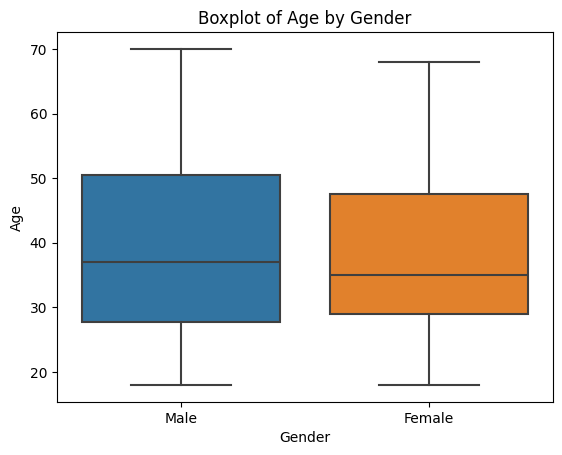

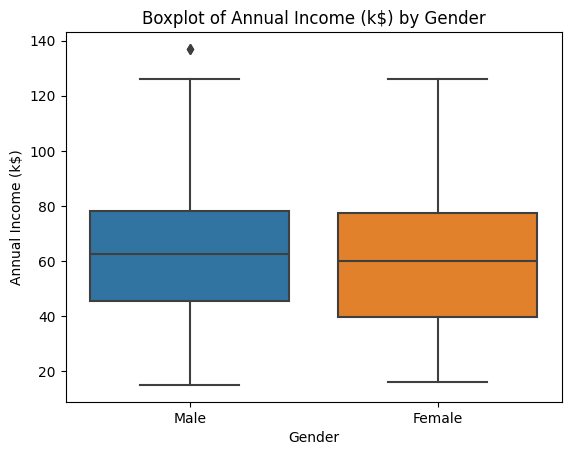

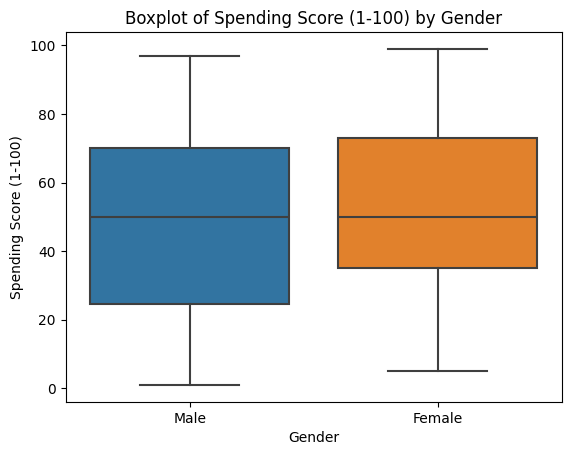

In [15]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for col in columns:
    plt.figure()
    sns.boxplot(data=df, x='Gender', y=col)
    plt.title(f'Boxplot of {col} by Gender')
    plt.show()

In [16]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

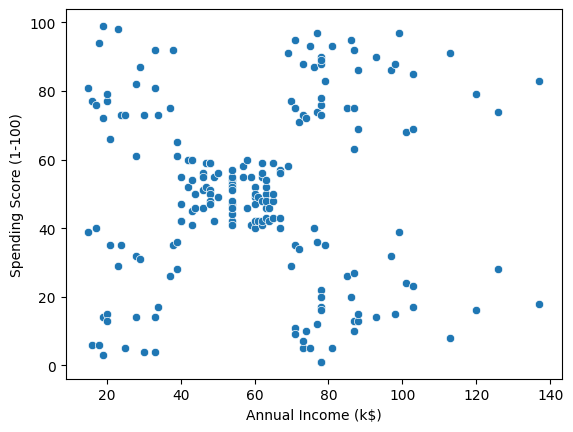

In [17]:
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)' )

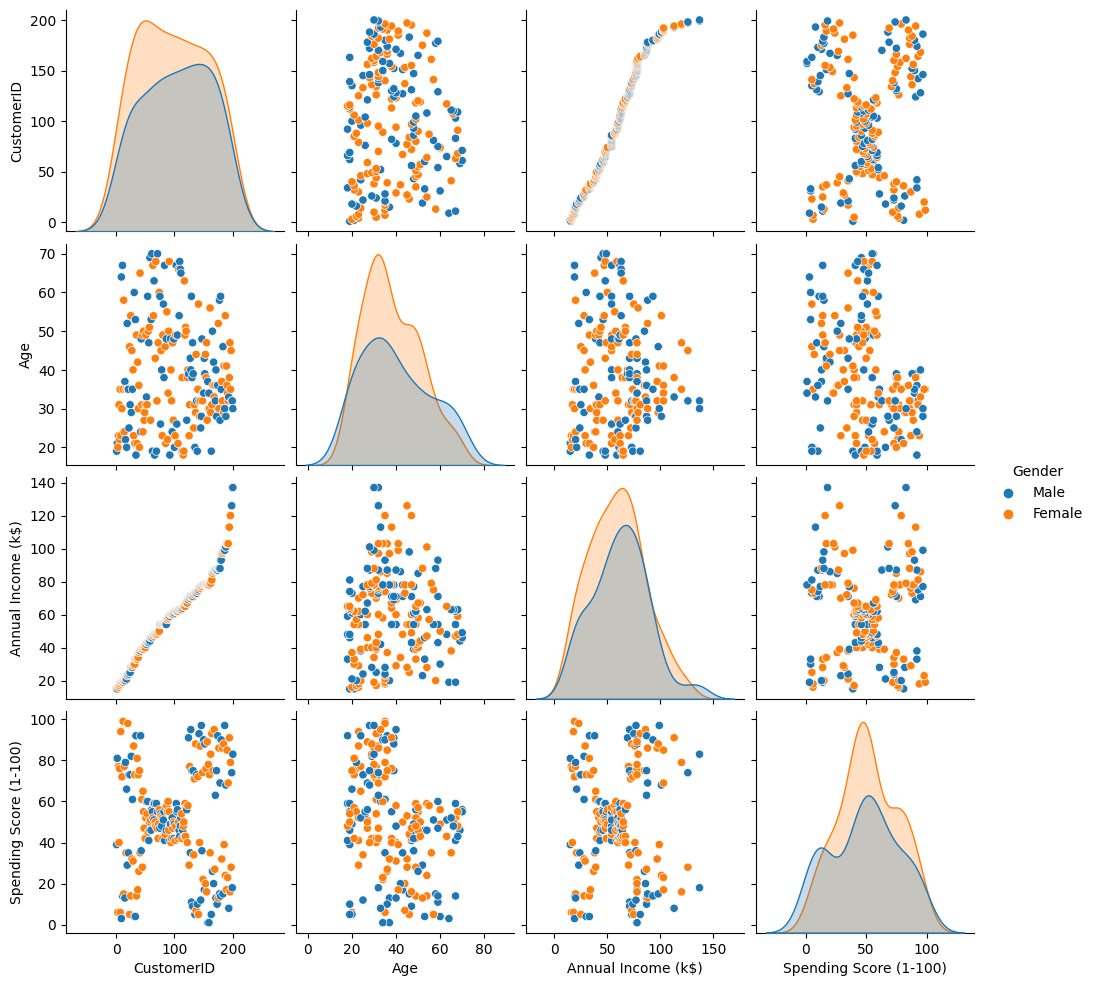

In [18]:
sns.pairplot(df,hue='Gender')

In [19]:
df.groupby('Gender').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean'
})

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [20]:
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

print(correlation_matrix)

                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


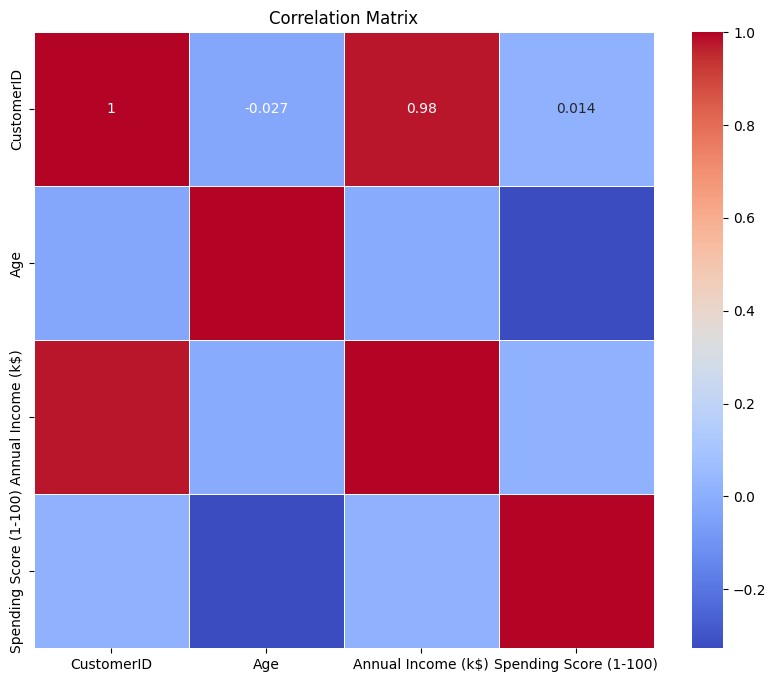

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [21]:
clustering1 = KMeans(n_clusters=3)

In [22]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [23]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [24]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [25]:
df['Income Cluster'].value_counts()

Income Cluster
2    92
0    72
1    36
Name: count, dtype: int64

In [26]:
clustering1.inertia_

23528.15217391304

In [27]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [28]:
intertia_scores

[137277.27999999997,
 48660.88888888889,
 23517.330930930933,
 13278.112713472485,
 8481.496190476191,
 5050.904761904762,
 3941.4163614163617,
 2836.339987789988,
 2218.1215728715724,
 1767.6406204906204]

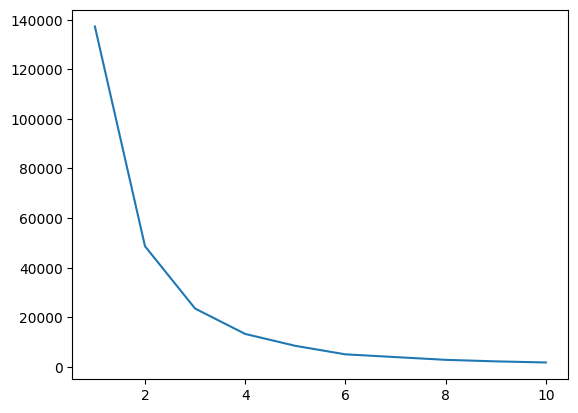

In [29]:
plt.plot(range(1,11),intertia_scores)

In [30]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [31]:
grouped_means = df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(grouped_means)

                      Age  Annual Income (k$)  Spending Score (1-100)
Income Cluster                                                       
0               38.930556           33.027778               50.166667
1               37.833333           99.888889               50.638889
2               39.184783           66.717391               50.054348


In [32]:
#Bivariate Clustering
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,2
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,0,2
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,2


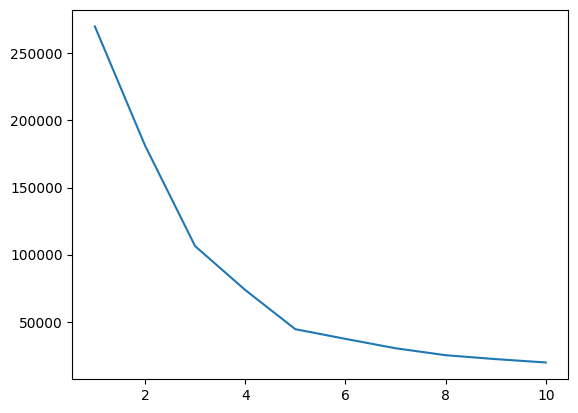

In [33]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

In [34]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

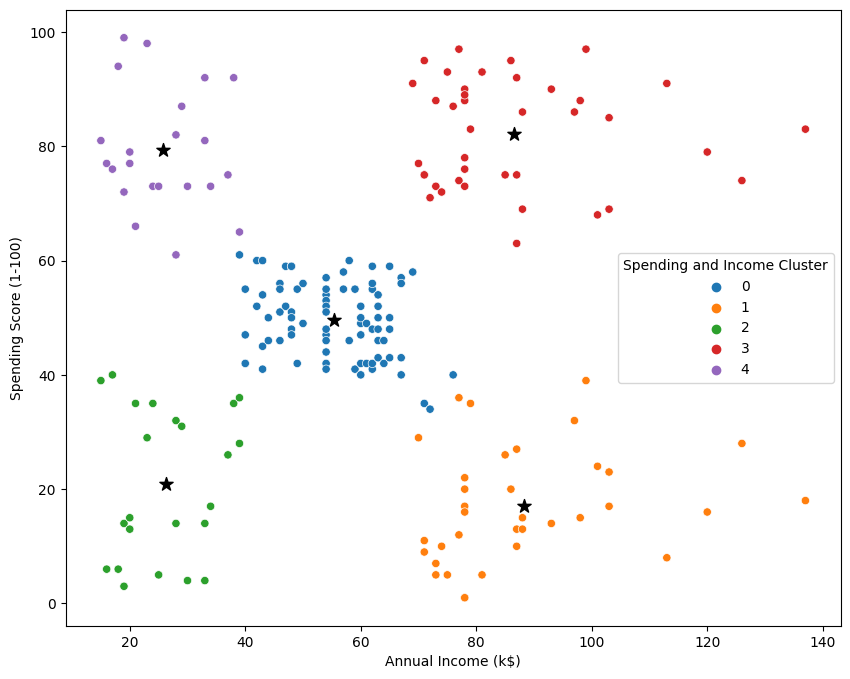

In [35]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [36]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.457143,0.542857
2,0.608696,0.391304
3,0.538462,0.461538
4,0.590909,0.409091


In [37]:
grouped_means = df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(grouped_means)

                                   Age  Annual Income (k$)  \
Spending and Income Cluster                                  
0                            42.716049           55.296296   
1                            41.114286           88.200000   
2                            45.217391           26.304348   
3                            32.692308           86.538462   
4                            25.272727           25.727273   

                             Spending Score (1-100)  
Spending and Income Cluster                          
0                                         49.518519  
1                                         17.114286  
2                                         20.913043  
3                                         82.128205  
4                                         79.363636  


In [38]:
#mulivariate clustering 
from sklearn.preprocessing import StandardScaler

In [39]:
scale = StandardScaler()

In [40]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,2
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,0,2
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,2


In [41]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,0,2,True
1,2,21,15,81,0,4,True
2,3,20,16,6,0,2,False
3,4,23,16,77,0,4,False
4,5,31,17,40,0,2,False


In [42]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [43]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [44]:
dff = scale.fit_transform(dff)

In [45]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


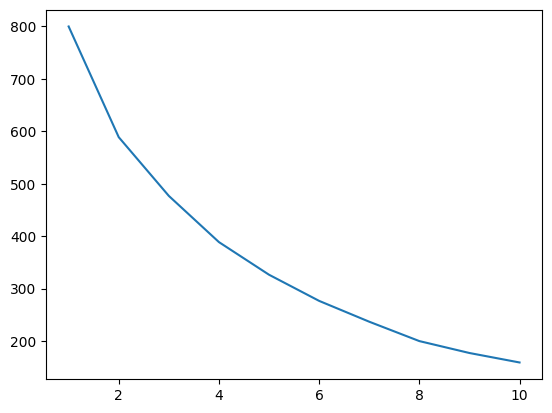

In [46]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [47]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,2
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,0,2
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,2
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,3
196,197,Female,45,126,28,1,1
197,198,Male,32,126,74,1,3
198,199,Male,32,137,18,1,1


In [48]:
df.to_csv('Clustering.csv')